In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import category_encoders as ce

%matplotlib inline

In [2]:
data = 'C:/Users/shwet/Downloads/Book1.csv'

df = pd.read_csv(data, header=None)

In [3]:
df.shape

(1461, 6)

In [4]:
df.head()

,0,1,2,3,4,5
0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street
1,1,60,RL,65,8450,Pave
2,2,20,RL,80,9600,Pave
3,3,60,RL,68,11250,Pave
4,4,70,RL,60,9550,Pave


In [5]:
col_names = ['Id','MSSubClass','MSZoning','LotFrontage','LotArea','Street']

df.columns = col_names

col_names

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street']

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street
0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street
1,1,60,RL,65,8450,Pave
2,2,20,RL,80,9600,Pave
3,3,60,RL,68,11250,Pave
4,4,70,RL,60,9550,Pave


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           1461 non-null   object
 1   MSSubClass   1461 non-null   object
 2   MSZoning     1461 non-null   object
 3   LotFrontage  1202 non-null   object
 4   LotArea      1461 non-null   object
 5   Street       1461 non-null   object
dtypes: object(6)
memory usage: 68.6+ KB


In [8]:
X = df.drop(['Street'], axis=1)

y = df['Street']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [12]:
X_train.shape, X_test.shape

((978, 5), (483, 5))

In [14]:
encoder = ce.OrdinalEncoder(cols=['Id','MSSubClass','MSZoning','LotFrontage','LotArea'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [15]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea
613,1,1,1,104,1
1303,2,1,1,1,2
486,3,2,1,2,3
561,4,2,1,104,4
308,5,3,2,104,5


In [16]:
X_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea
892,-1.0,1,1,11.0,-1.0
1105,-1.0,8,2,27.0,-1.0
413,-1.0,2,3,104.0,-1.0
522,-1.0,2,1,30.0,-1.0
1036,-1.0,2,1,104.0,53.0


In [17]:
from sklearn.tree import DecisionTreeClassifier


In [18]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [19]:
y_pred_en = clf_en.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9959


In [21]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave',
       'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave',
       'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave',
       'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave',
       'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave',
       'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave',
       'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave',
       'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave',
       'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave',
       'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave',
       'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave',
       'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave',
       'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave',
       'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave', 'Pave',
      

In [22]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.9969


In [23]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9969
Test set score: 0.9959


[Text(0.5416666666666666, 0.875, 'x[2] <= 4.5\nentropy = 0.05\nsamples = 978\nvalue = [4, 973, 1]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 9.5\nentropy = 0.03\nsamples = 971\nvalue = [3, 968, 0]'),
 Text(0.16666666666666666, 0.375, 'x[0] <= 111.5\nentropy = 0.013\nsamples = 894\nvalue = [1, 893, 0]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.078\nsamples = 104\nvalue = [1, 103, 0]'),
 Text(0.25, 0.125, 'entropy = 0.0\nsamples = 790\nvalue = [0, 790, 0]'),
 Text(0.5, 0.375, 'x[3] <= 77.5\nentropy = 0.174\nsamples = 77\nvalue = [2, 75, 0]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.0\nsamples = 68\nvalue = [0, 68, 0]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.764\nsamples = 9\nvalue = [2, 7, 0]'),
 Text(0.75, 0.625, 'x[3] <= 62.0\nentropy = 1.149\nsamples = 7\nvalue = [1, 5, 1]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(0.8333333333333334, 0.375, 'x[1] <= 10.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.7

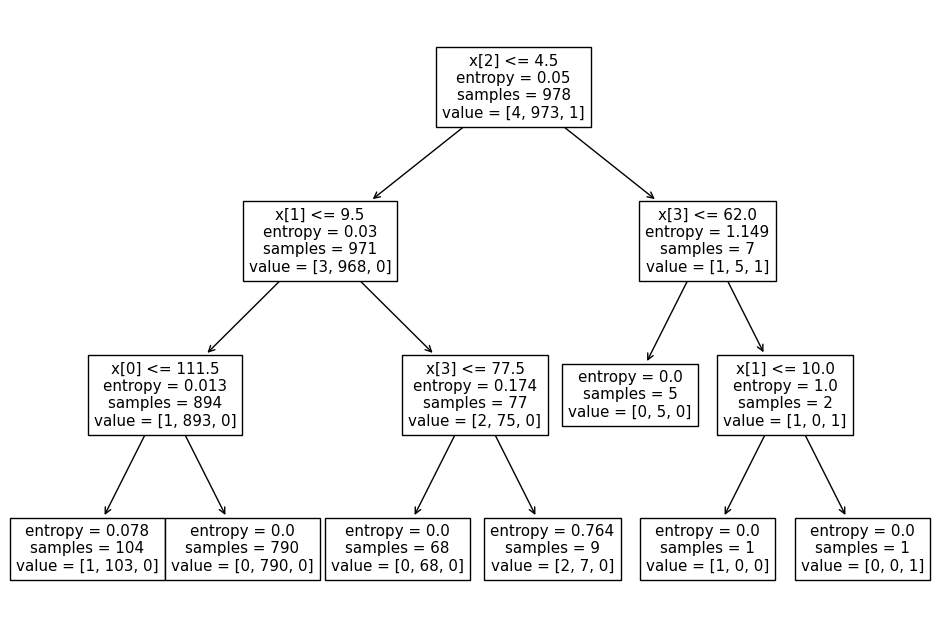

In [24]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [25]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[  0   2]
 [  0 481]]
